# Sales Analysis refrenced from https://www.youtube.com/watch?v=eMOA1pPVUc4&t=4340s (Keith Galli)

In [81]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt

## Merging 12 months of saales data into a single file

In [28]:
files = [file for file in os.listdir('./Sales_Data')]
all_mon_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_mon_data = pd.concat([all_mon_data, df])
all_mon_data.to_csv("all_data_csv", index=False)

## Read in updated dataframe

In [29]:
all_data = pd.read_csv('all_data_csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Clean Up Data

### droping na () and or

In [30]:
all_data = all_data.dropna(how='all')

In [31]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

## Covnverting data into numeric form

In [32]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])



## Augment data with additional columns

#### Adding month column

In [33]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months'] = all_data['Months'].astype('int64')

### Adding a Sales Column

In [34]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

### Most Sales in One Months

In [35]:
most_sale = all_data.groupby('Months').sum()
most_sale['Sales']

Months
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

### Charting data for Months

Text(0.5, 0, 'Time of Year')

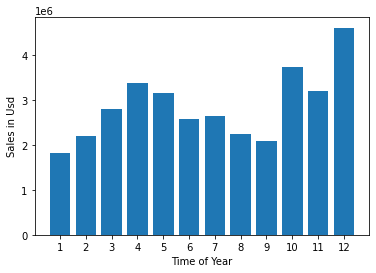

In [36]:
months = range(1,13)
plt.bar(months, most_sale['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Usd')
plt.xlabel('Time of Year')

### Finding sales based on City 

In [37]:

all_data['City'] = all_data['Purchase Address'].astype('str')
all_data['City'] = [str(x).split(',')[1]+' '+str(x).split(',')[2].split(' ')[1] for x in all_data['City']]
most_sale_city = all_data.groupby('City').sum()
most_sale_city

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


<BarContainer object of 10 artists>

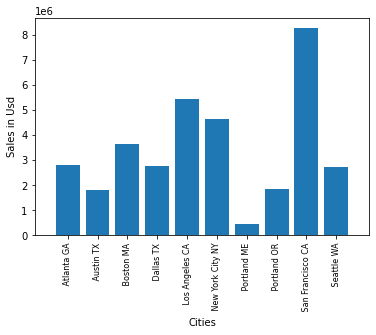

In [42]:
city = most_sale_city.index.values.tolist()
plt.bar(city, most_sale_city['Sales'])
plt.xticks(city,size=8,rotation='vertical')
plt.ylabel('Sales in Usd')
plt.xlabel('Cities')
plt.bar(city,height=1,width=1.2)

### Which time gives is best for advertisnment?

In [40]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

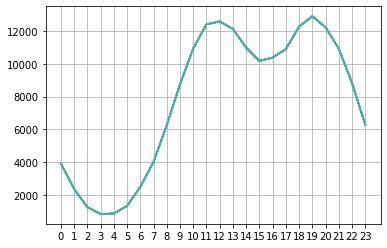

In [47]:
hour = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hour, all_data.groupby('Hour').count())
plt.xticks(hour)
plt.grid()

### Which Products is sold together

In [43]:
df = all_data.loc[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df

/home/sayx1/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [44]:
df

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [46]:
from itertools import combinations
from collections import Counter 

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


## Which Product Sold the Most?

In [79]:
products_grouped = all_data.groupby('Product').sum()
quantity_ordered = products_grouped['Quantity Ordered']

products = products_grouped.index.values
products = pd.Series(products).tolist()



## Graphing

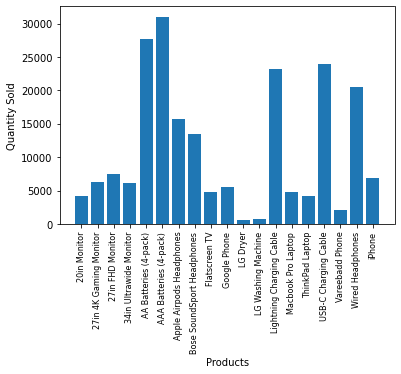

In [80]:
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.show()

In [83]:
price = all_data.groupby('Product').mean()['Price Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

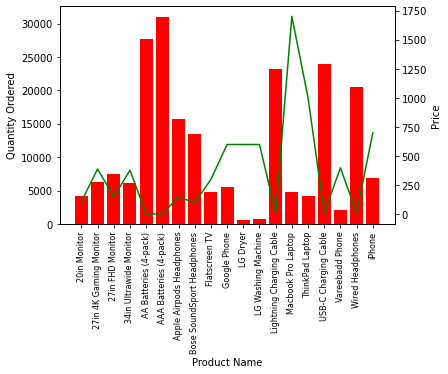

In [96]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='r')
ax2.plot(products,price,color='g')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(products, rotation='vertical',size=8)
plt.show()
